# Breast Cancer Wisconsin (Diagnostic) Data Set

The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available data set from the UCI machine learning repository. The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei present in the image. The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.

# Feature explanation  

Let's load our dataset as a dataframe and explore what kind of features are given along with their datatypes.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("./data/breast_cancer_data.csv", index_col = 'id')

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA  
Let's look at the general statistics. including mean, std, median, percentiles, and range.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Let's have a look how the target class is distributed

In [5]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

As it can be seen, there is no missing values, except for the last column. All independent features are numerical and the target feature is converted to categorical.

In [6]:
#And convert it to categorical feature:
df['diagnosis'] = df['diagnosis'].astype('category')

#Remove the last empty column
df.drop('Unnamed: 32',axis = 1 ,inplace = True)

It might be useful to convert the target class denoting malignant as 0 and benign as 1, and examine correlation among variables:

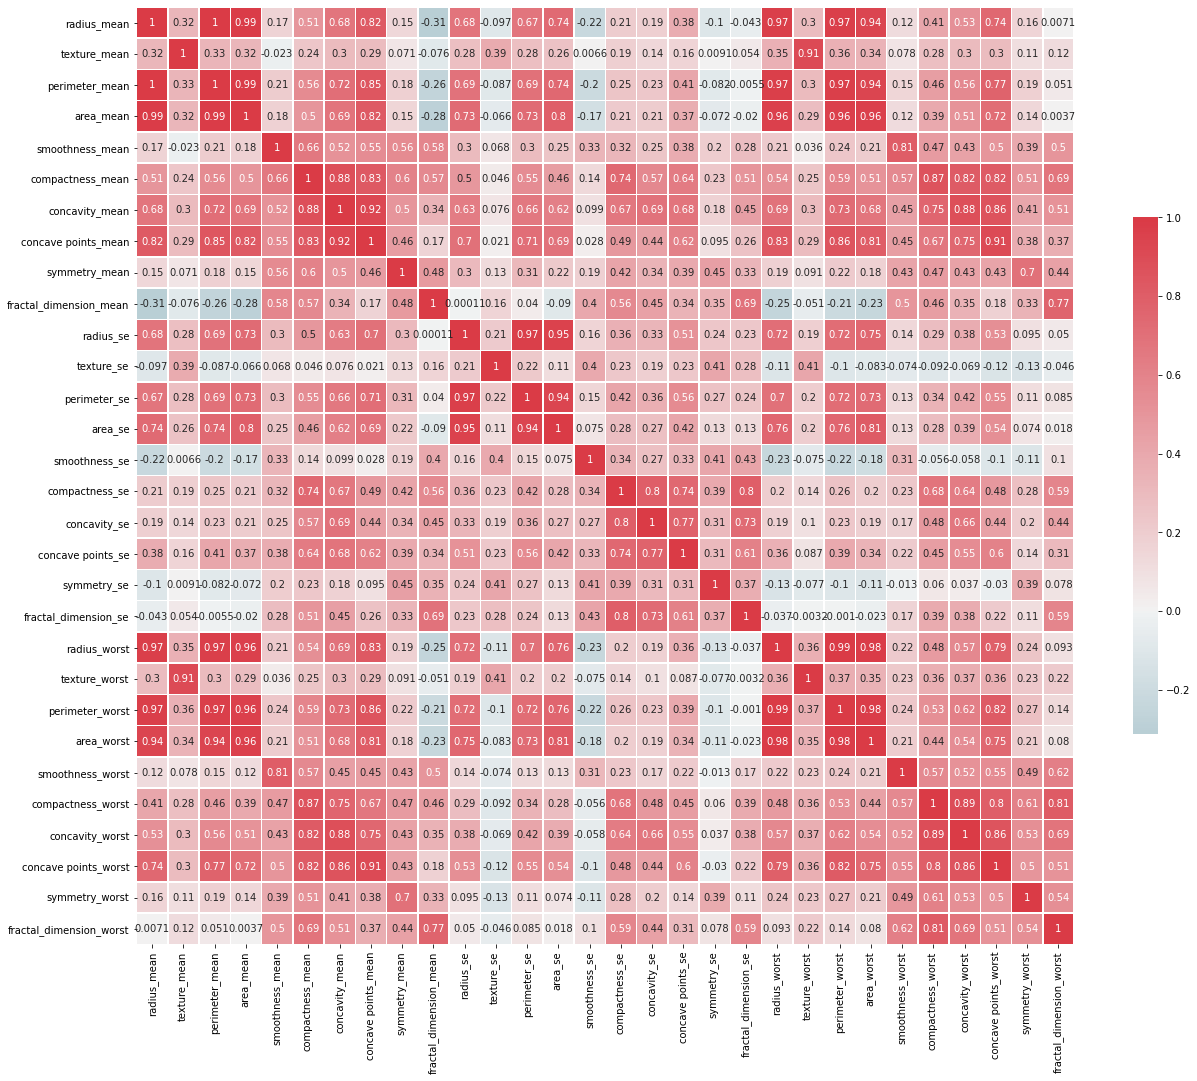

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

There are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. That is not surprising, as these features were modeled in such way that higher values are typically associated with malignancy. To examine multicollinearity I will look at pairwise scatter plots of pairs of first 10 and last 10 variables (in the sake of simplicity and visualization), looking for near perfect relationships.

In [8]:
# use Python comprehension list syntax

means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

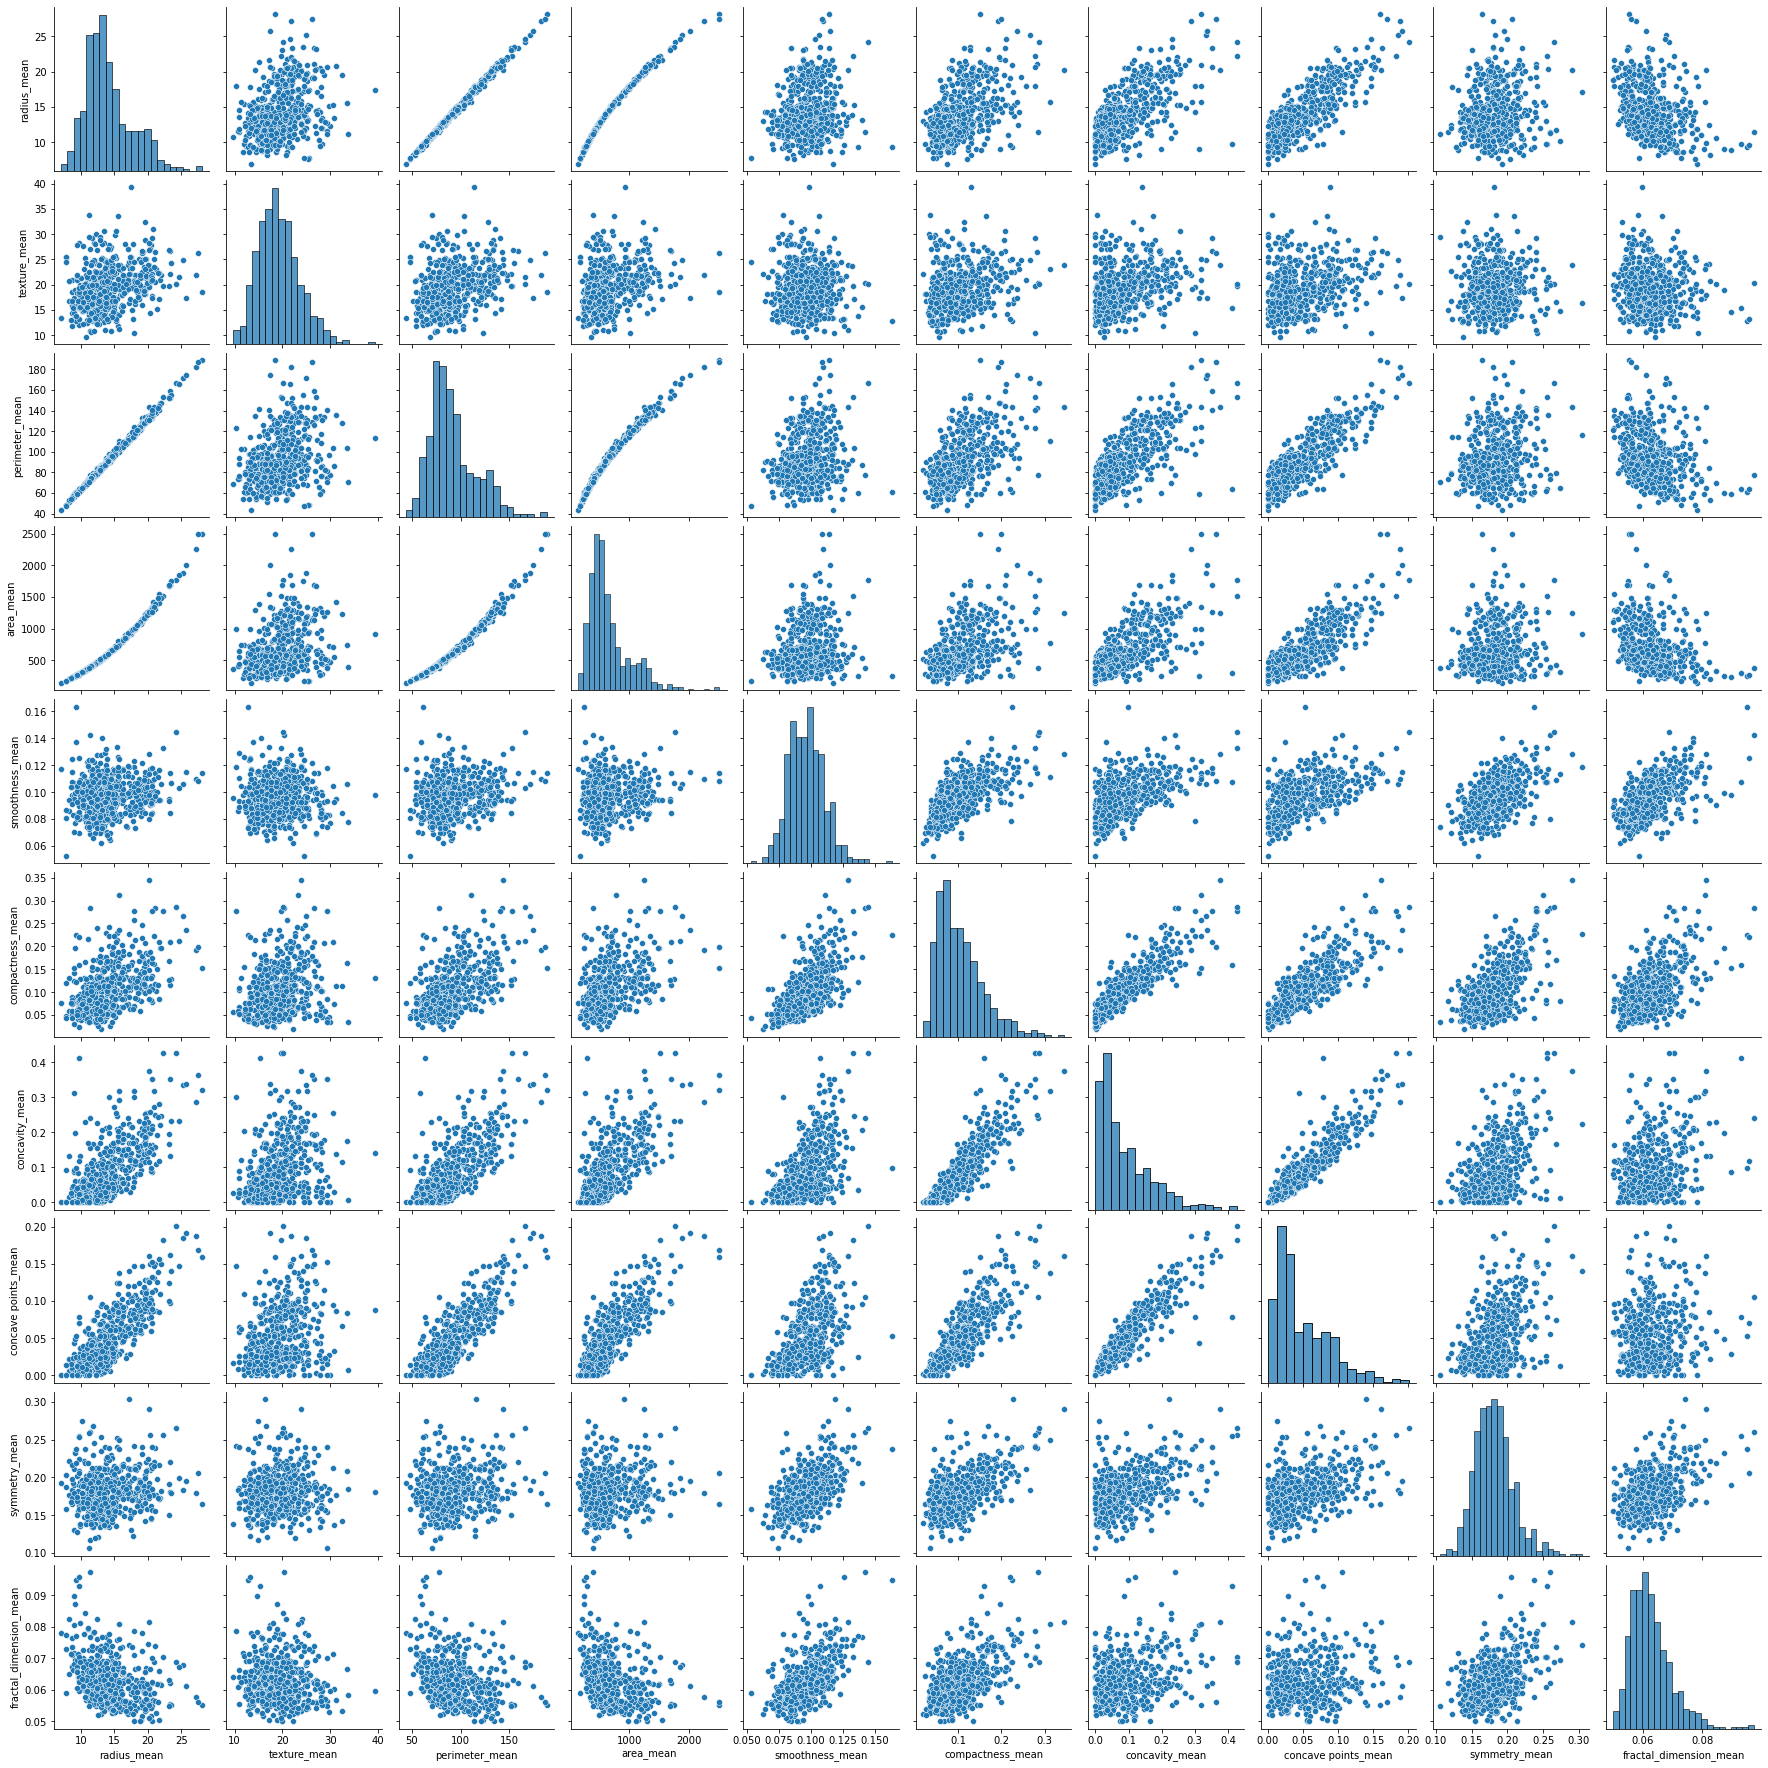

In [11]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[means]);

Next, let's see how means are distributed among target class:

In [12]:
means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

I standartized variables, as their ranges are quite different and not representable on a small graph. Every violinplot includes markers indicating the median and the interquartile (middle 50%) range. In first nine features the median of malignant tumor is easily contrasted with the benign. Generally speaking, for the benign mass the median is lower for all features, which makes sense, because features were modeled such that higher values are typically associated with malignancy.

For example,area_mean is higher for cancerous mass on average.

Let's look at the standart deviation of features:

# PCA
Too many variables can cause such problems as too complex visualizations, efficiency decrease by including variables that have no effect or difficult data interpretation. Principal component analysis (PCA) is a mathematical procedure that transforms a number of (possibly) correlated variables into a smaller number of uncorrelated variables called principal components. The data has 30 dimensions, but I reduce it creating 2 principal components to see whether variables can be separated into clusters. Two target classes, where dark is benign and light is malignant, are almost linearly separable:

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


Projecting 31-dimensional data to 2D


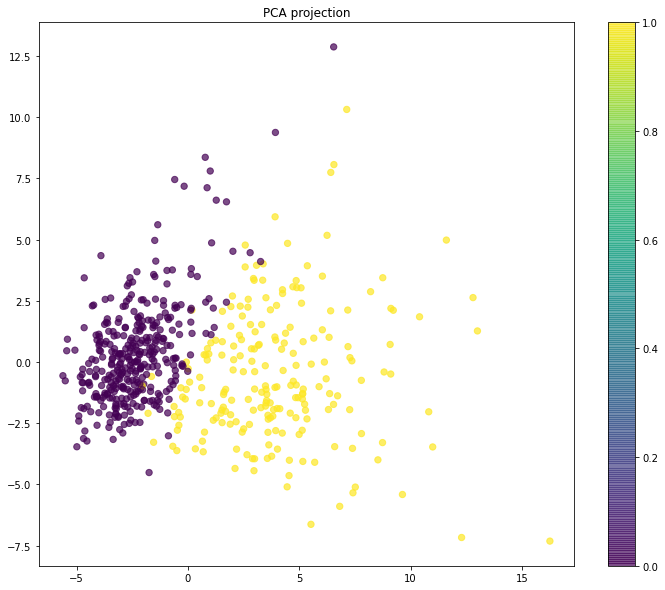

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
X= df

X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion (via the explained_variance_ratio). Here, that means retaining 6 principal components; therefore, we reduce the dimensionality from 30 features to 6.

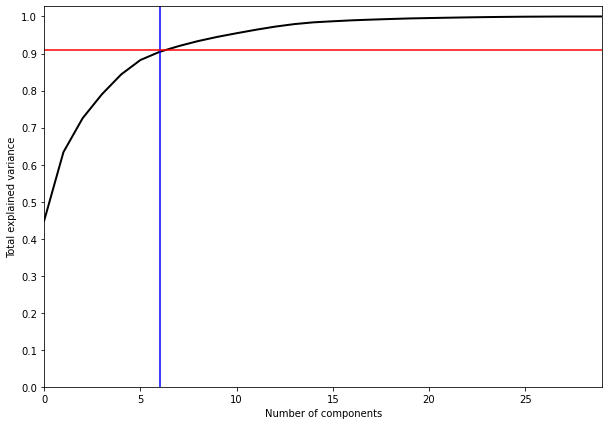

In [15]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

As it can be seen, that the first 6 components correspond to approximately 91% of the cumulative sum over all the variance. I am going to stick with PCA, since it provides similar results to t-SNE and takes less time to compute the components. And later, I will compare classification performance for the initial dataset and for pca components.

Data cleaning As the dataset is not large, I am not going to remove any outliers in order to keep as much data as possible. But to avoid multicollinearity, I will remove some of the features to prevent overfitting. From the EDA we now know that radius, perimeter, and area are highly correlated, which makes sense. That is why it would be better to remove, say, perimeter, and area, as well as all features from "worst" samples, since worst (or largest) instances are also considered in the initial sample, which means and standart errors were computed for, therefore it leads to high correlation (>0.80), which is not surprising, too. For example, the correlation between radius_worst and radius_mean is 0.97, for texture_mean and texture_worst pair it equals to 0.91, and so on and so forth.

# Normalization
Before scaling numerical features, let's check whether they follow normal distribution:

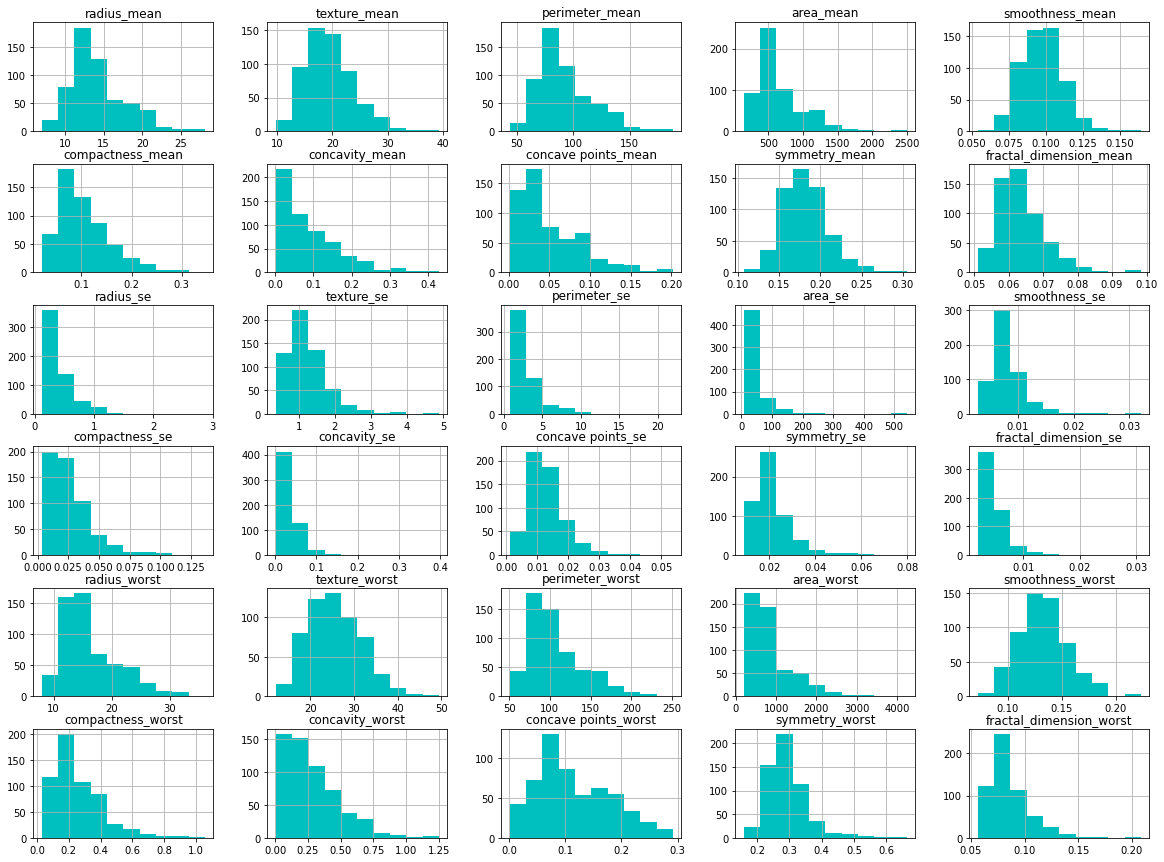

In [52]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

Almost all distributions are skewed to the right, i.e. rise very sharply in the beginning (i.e. for very small values near zero), peaks out early, then decreases sharply and leave the long tail. Each histogram is similar to lognormal distribution, a continuous distribution in which the logarithm of a variable has a normal distribution. For algorithms like linear regressions and kNN, numerical features have to be scaled in order to avoid over fitting and make more accurate predictions. And to be scaled numerical features must follow normal distribution.

A log transformation, a popular method, is often used to transform skewed data to approximately normal and thus, to augment the reliability of the linear regression analyses. I will apply log function to make features normally

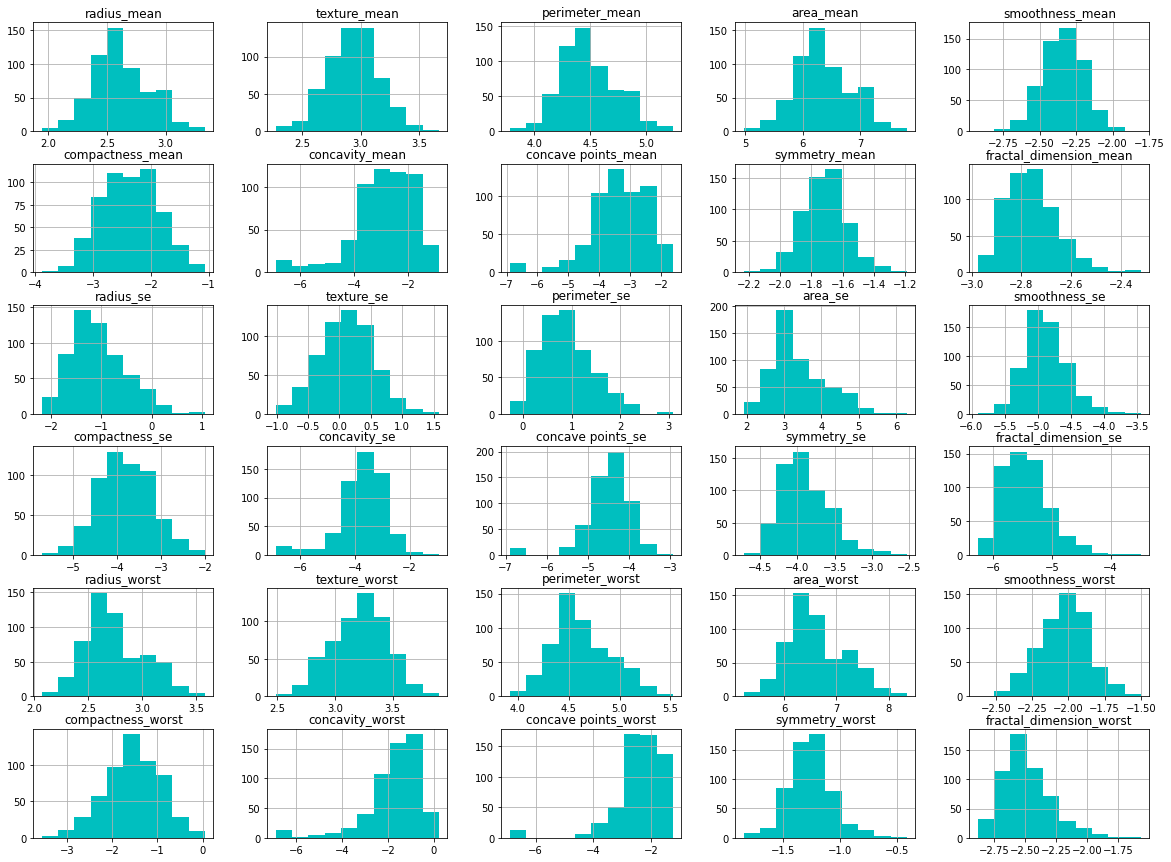

In [16]:
#Log transformation
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

Overall, almost all features have bell-shaped distribution, despite concave points features, which could be affected by malignant instances, where the number of contour concavities increases dramatically. I will use the log-transformation in Logistic regression and kNN algorithms before scaling the data. Then numerical features will be scaled with StandartScaler() function in Python, such that the distribution has a mean value of 0 and a standard deviation of 1.

In [25]:
from sklearn.model_selection import train_test_split

#Scaler should be trained on train set only to prevent information about future from leaking.

y = df['diagnosis']

X_log_train, X_log_holdout, y_train, y_holdout = train_test_split(X_log, y, test_size=0.3, random_state=17)

# Decision tree
Decision tree is one of the simplest algorithms, which can be used for classification and regression, where the relationship between features and outcome is nonlinear or where features interact with each other. Decision trees in general do not usually require scaling. With the help of GridSearchCV function in Python, which exhaustively searches model optimal parameters by cross-validated grid-search over a parameter grid, best parameters, such as the depth of the tree, split criteria, the minimum number of samples for a leaf node, can be identified:

In [36]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': range(3, 6)},
             scoring='recall')

In [37]:
#Best Parameters
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'gini', 'max_depth': 4, 'max_features': 4}, 0.9204166666666665)

The best split criteria here is the entropy, the depth of the tree equals to 2, as all instances are fully exhausted within two splits. The visualization has the following meaning: the higher the number of concave points in the cell nucleus and the greater the radius is, the higher the probability that the cell is cancerous.

One of the main disadvantages of using Decision tree is a prone to overfitting. We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Furthermore, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.

In addition, the trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

tree_pred = tree_grid.predict(X_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, tree_pred))

Accuracy Score :  0.9532163742690059
Recall Score (how much of malignant tumours were predicted correctly) :  0.9508196721311475
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9206349206349206


Recall equals to 0.9672, Precision Score is 0.8310, and Accuracy Score = 0.9181

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_holdout, tree_pred)

array([[105,   5],
       [  3,  58]])

In [44]:
# Need to install graphviz (sudo apt install graphviz for Ubuntu/Debian Linux)

from sklearn.tree import export_graphviz
tree_graph = export_graphviz(tree_grid.best_estimator_, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png 

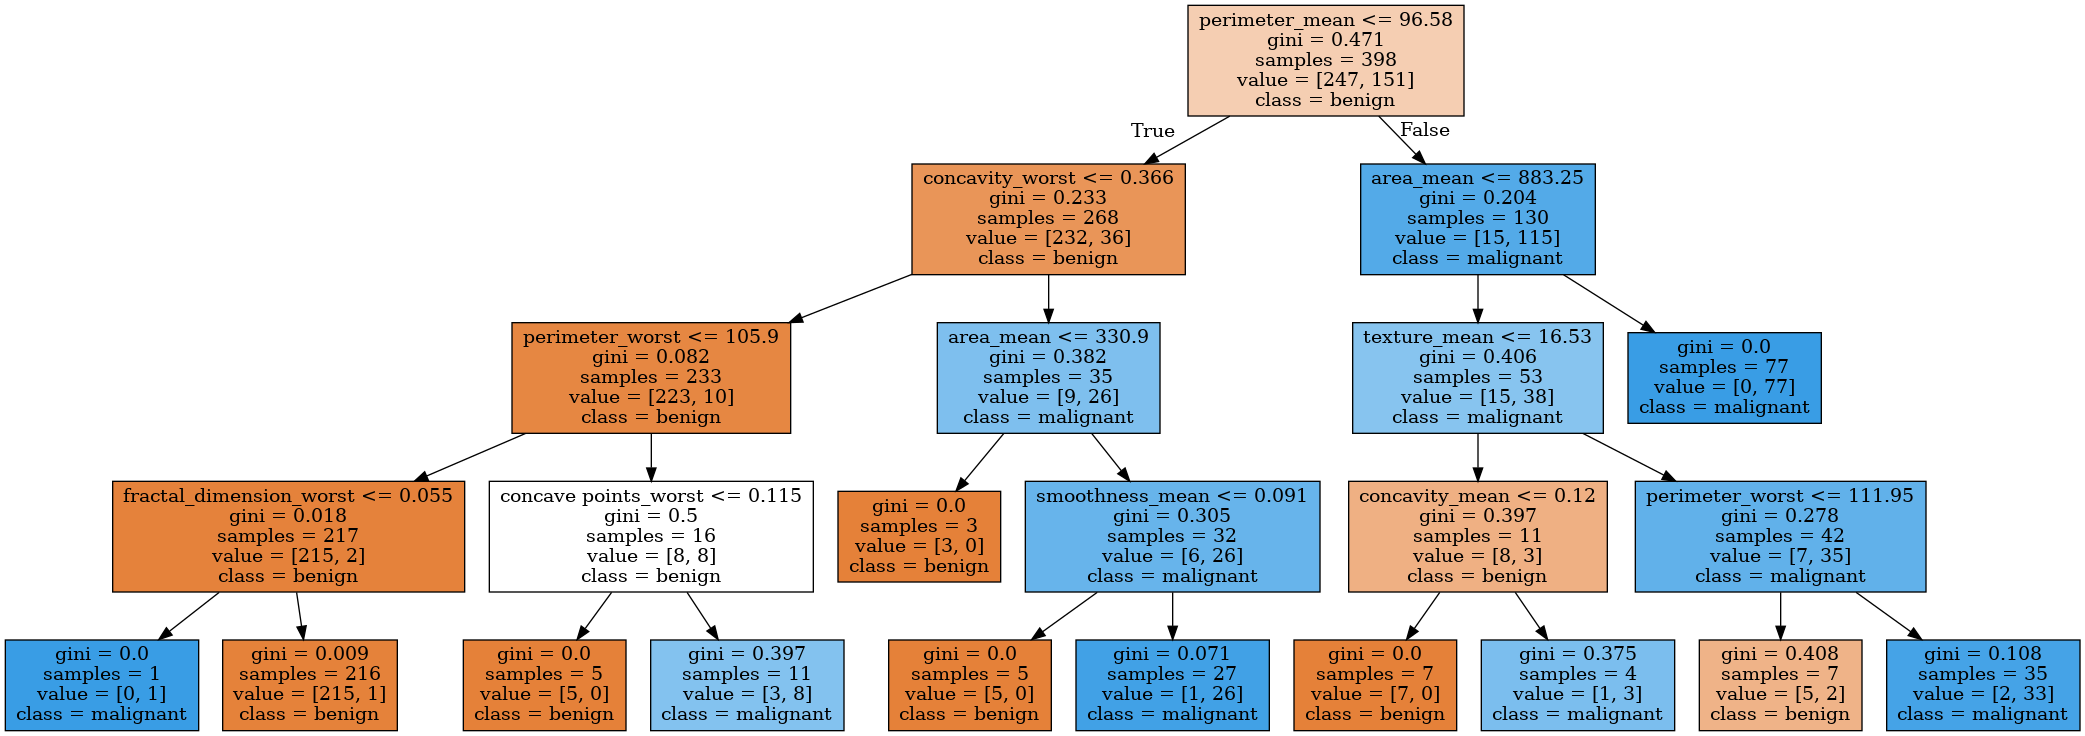

In [45]:
from IPython.display import Image
Image(filename = 'tree.png')

# Logistic Regression
with normalized data

Logistic Regression is one of the most used Machine Learning algorithms for binary classification. It is a widely used technique because it is very efficient, does not require too many computational resources, highly interpretable, and easy to regularize. The implementation of logistic regression in Python can be accessed from class LogisticRegression in scikit-learn library. This implementation can fit binary logistic regression with default L2 or L1 regularization.

In [31]:
Cs = np.logspace(-1, 8, 5)

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=17,
                                                           solver='liblinear'))]),
             param_grid={'lr__C': array([1.00000000e-01, 1.77827941e+01, 3.16227766e+03, 5.62341325e+05,
       1.00000000e+08])},
             scoring='recall')

In [46]:
#Best parameters
lr_pipe_grid.best_params_, lr_pipe_grid.best_score_

({'lr__C': 0.1}, 0.9541666666666668)

In [50]:
scores=[]
for C in Cs:
    pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=C, random_state=17,solver='liblinear'))])
    scores.append(cross_val_score(pipe,X_log_train, y_train,cv=10, scoring='recall').mean())

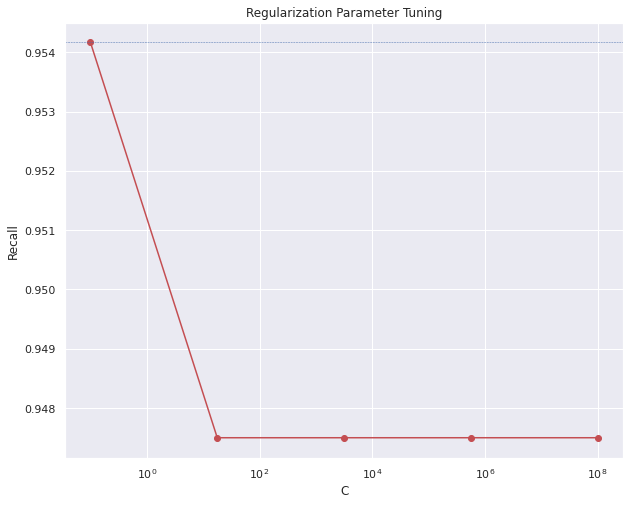

In [51]:
score_C_1 = lr_pipe_grid.best_score_
sns.set()
plt.figure(figsize=(10,8))
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Regularization Parameter Tuning')
# horizontal line -- model quality with default C value
plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

In [52]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))

Accuracy Score :  0.9824561403508771
Recall Score (how much of malignant tumours were predicted correctly) :  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9833333333333333


Accuracy Score : 0.9532, Recall is 0.9016, and precision is 0.9649

By default, LogisticRegression() use L2 penalty, and I search for a best regularization parameter C, the inverse of regularization strength. I fitted the logit model both on non-normalized and normalized data to compare the results and examine the performance of both approaches:

a) Logistic regression fits raw data and makes predictions based on non-scaled features. It resulted in almost zero coefficients for three features: radius_mean, texture_mean and texture_se. These features have larger ranges in comparison with other attributes, and logistic regression assigns very small coefficients to them to reduce their impact on a result. At the same time, concavity_se and concave_points_se have small ranges and concave_points_se feature varies approximately from 0 to 0.05, while radius_mean lies within 6.98 and 28.11 values. It means that small changes in concave_points_se could affect the result and change the target class from 0 to 1 or the other way around, while small changes in radius_mean could not make such big impact and hardly has any effect on the response variable. In this case, greater coefficients are assigned for concavity_se and concave_points_se attributes:

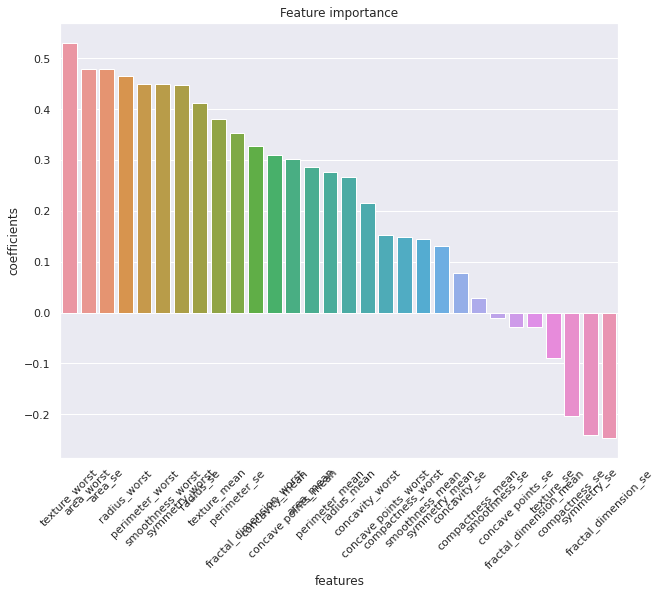

In [53]:
lr_best_pipe = lr_pipe_grid.best_estimator_.named_steps['lr']

#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best_pipe.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)

#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=45);

with non-normalized data

In [54]:
C_scores = np.logspace(-1, 8, 5)

lr = LogisticRegression(random_state=17,solver='liblinear')

lr_params = {'C': C_scores}

lr_grid = GridSearchCV(lr, lr_params, cv=10, scoring='recall')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=17, solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 1.77827941e+01, 3.16227766e+03, 5.62341325e+05,
       1.00000000e+08])},
             scoring='recall')

In [55]:
lr_grid.best_params_, lr_grid.best_score_

({'C': 562341.3251903491}, 0.9479166666666666)

In [56]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_grid.predict(X_log_holdout)))

Accuracy Score :  0.6432748538011696
Recall Score (how much of malignant tumours were predicted correctly) :  0.0
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.0


/home/sopha/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After that GridSearch() implements a “fit” and a “score” method. When “fitting” LogisticRegression on a dataset all the possible values of regularization parameter are evaluated using 10-fold stratified cross-validation and the best value and array of scores are retained.

One of the simplest options to understand the influence of given parameters in a linear classification model, is to consider the magnitude of its coefficient times the standard deviation of the corresponding parameters in the data. As variables have been already scaled, I simply visualize the magnitude of coefficients in the logit model:


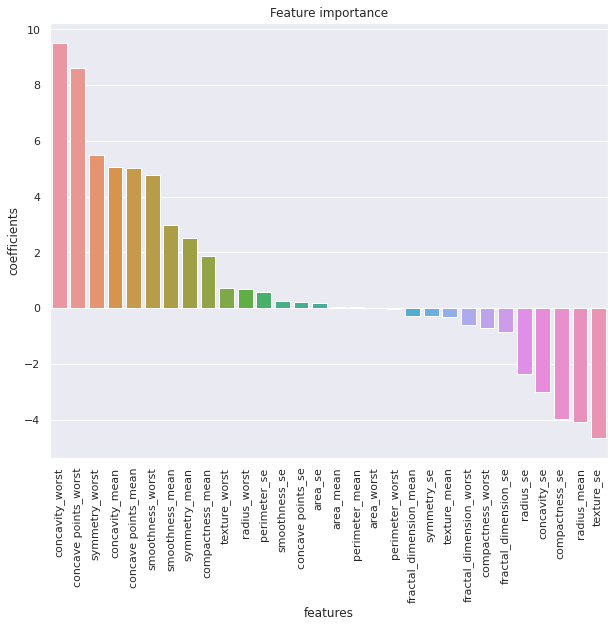

In [57]:
lr_best= lr_grid.best_estimator_

#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)

#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=90);

# Random Forest
Random forest is the construction of uncorrelated trees using CART, bagging, and the random subspace method. Decision trees are a good choice for the base classifier in bagging since they are quite sophisticated and can achieve zero classification error on any sample. The random subspace method reduces the correlation between the trees and thus prevents overfitting. With bagging, the base algorithms are trained on different random subsets of the original feature set.

There are many successful use cases where the random forest algorithm was used in highly unbalanced datasets. But the best hyperparameters are usually impossible to determine ahead of time. Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations to evaluate the performance of each model. Using Scikit-Learn’s GridSearchCV method, I define a grid of hyperparameter ranges, and randomly sample from the grid, performing Stratified K-Fold cross-validation with each combination of values.

In [60]:
from sklearn.ensemble import RandomForestClassifier

#Stratified split for the validation process
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters
rfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,3), 'max_depth': range(3,13), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1)

gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 13),
                         'max_features': range(1, 11),
                         'min_samples_leaf': range(1, 3)},
             scoring='recall')

In [61]:
gcv.best_params_, gcv.best_score_

({'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 10,
  'min_samples_leaf': 2},
 0.9541666666666668)

In [62]:
#RandomForest classifier with the default parameters 
rfc = RandomForestClassifier(n_estimators=100, criterion ='gini', max_depth = 8, max_features = 6, min_samples_leaf = 1, random_state = 17, n_jobs=-1)
forest_pred = gcv.predict(X_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, forest_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, forest_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, forest_pred))

Accuracy Score :  0.9649122807017544
Recall Score (how much of malignant tumours were predicted correctly) :  0.9344262295081968
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9661016949152542


In [63]:
rfc = gcv.best_estimator_
estimators_tree_98 = rfc.estimators_[98]

estimators_tree_3 = rfc.estimators_[3]

estimators_tree_47 = rfc.estimators_[47]

In [64]:
estimators_tree_3.n_features_

30

To interpret results of Random Forest classifier randomly selected trees could be visualized:

In [66]:
tree_graph_98 = export_graphviz(estimators_tree_98, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_98.dot')
!dot -Tpng tree_98.dot -o tree_98.png 

tree_graph_3 = export_graphviz(estimators_tree_3, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_3.dot')
!dot -Tpng tree_3.dot -o tree_3.png 

tree_graph_47 = export_graphviz(estimators_tree_47, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_47.dot')
!dot -Tpng tree_47.dot -o tree_47.png

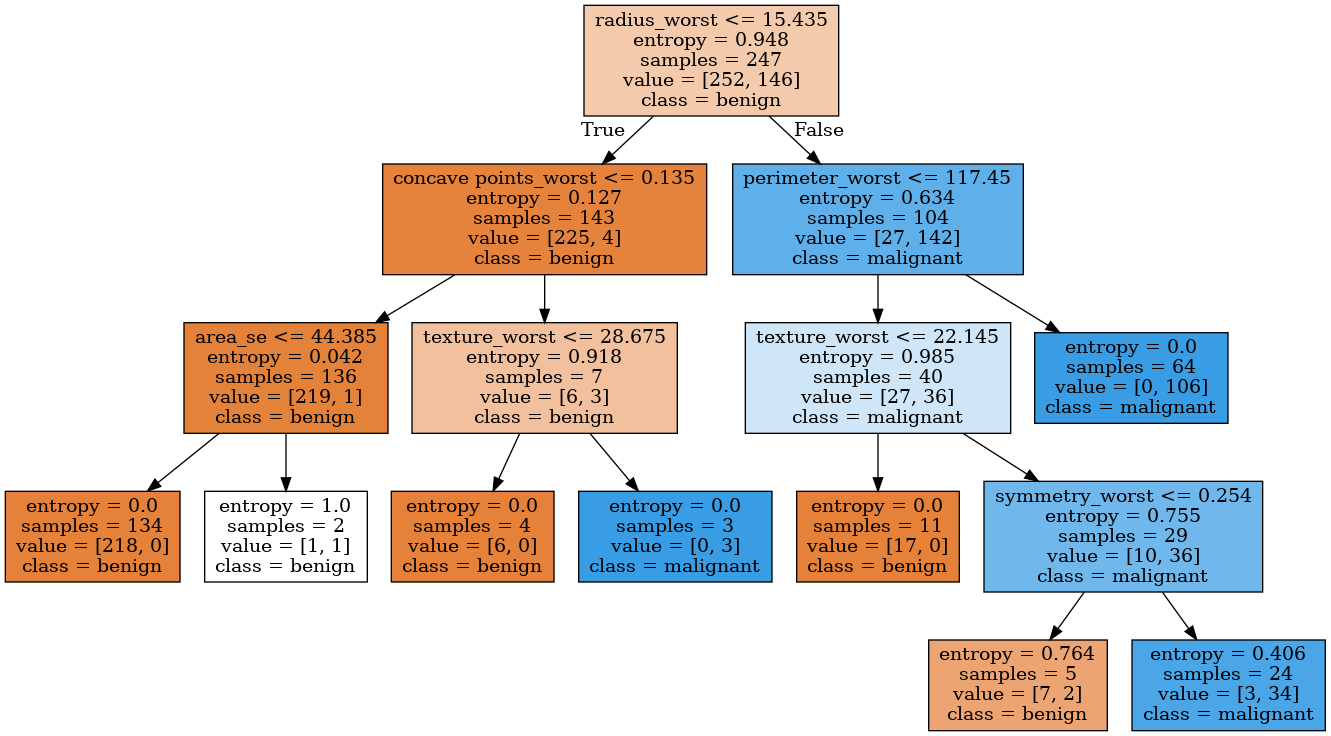

In [67]:
Image(filename = 'tree_98.png')

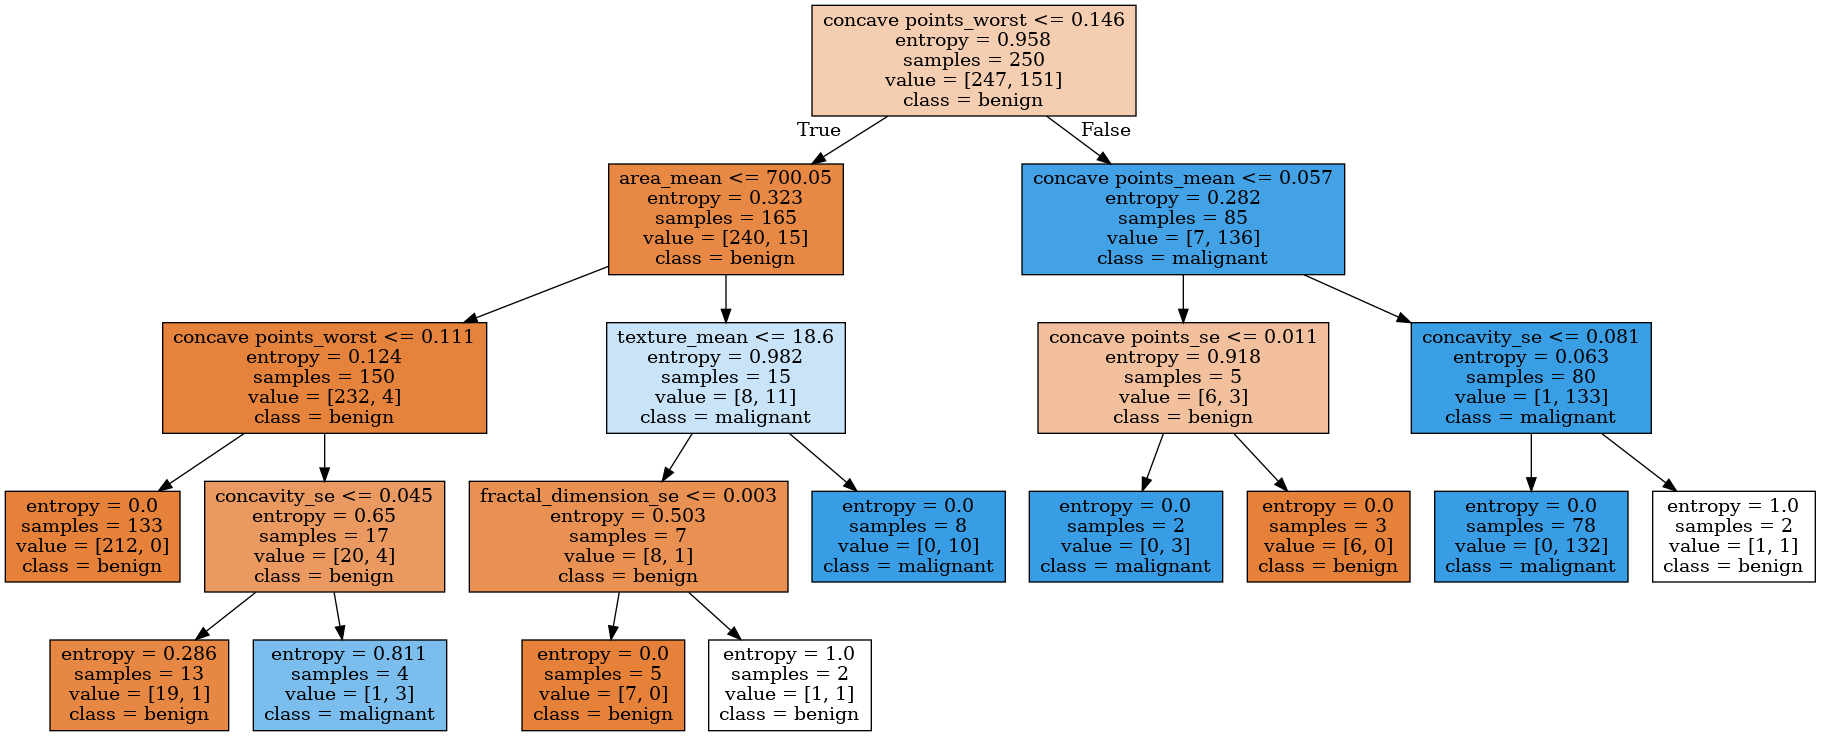

In [68]:
Image(filename = 'tree_3.png')

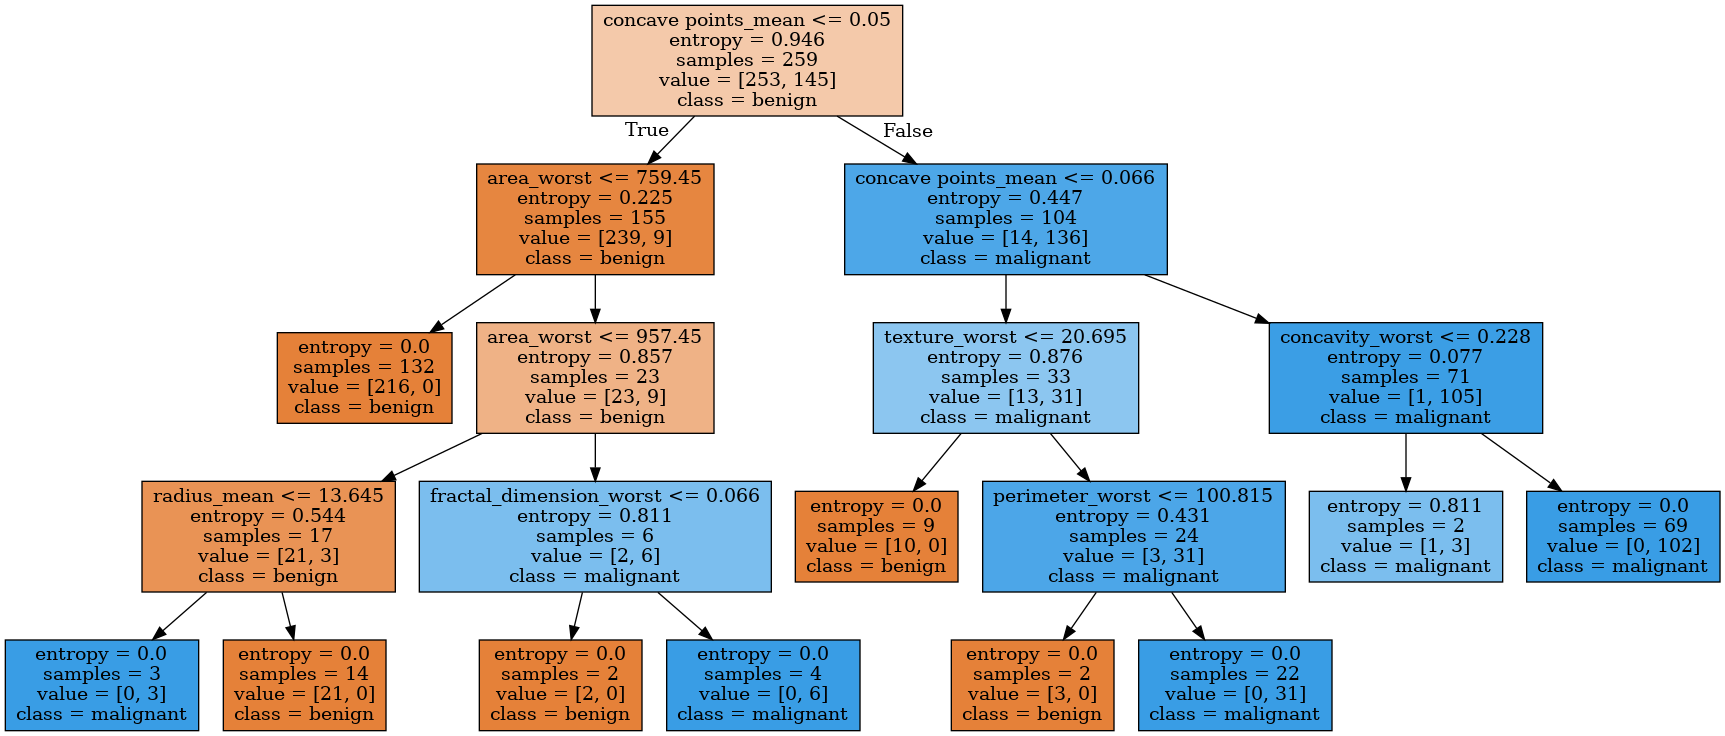

In [69]:
Image(filename = 'tree_47.png')

As can be seen, concavity_mean is the root node and has the highest information gain, which is why it is split first. The second nodes are texture_mean and concavity_se: the less contrasted the picture is, the more probability that the cell nucleus is benign.

One of the greatest advantages of using Random forest in a classification problem is that it is robust to outliers because of the random sampling method. Moreover, it handles both continuous and discrete variables equally well. In practice, an increase in the tree number almost always improves the composition and therefore rarely overfits. But in comparison with a single decision tree, Random Forest's output is more difficult to interpret.

In [70]:
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1))])

rf_params = {'rf__max_features': range(3,10), 'rf__min_samples_leaf': range(1,3), 'rf__max_depth': range(5,12), 'rf__criterion':['gini','entropy']}


rf_pipe_grid = GridSearchCV(rf_pipe, rf_params, cv=10, scoring='recall')
rf_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=17))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(5, 12),
                         'rf__max_features': range(3, 10),
                         'rf__min_samples_leaf': range(1, 3)},
             scoring='recall')

In [71]:
rf_pipe_grid.best_params_, rf_pipe_grid.best_score_

({'rf__criterion': 'entropy',
  'rf__max_depth': 8,
  'rf__max_features': 3,
  'rf__min_samples_leaf': 1},
 0.9541666666666668)

In [72]:
print ("Accuracy Score on scaled data: ",accuracy_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))

Accuracy Score on scaled data:  0.9707602339181286
Recall Score (how much of malignant tumours were predicted correctly) :  0.9508196721311475
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9666666666666667


# kNN
The nearest neighbors method is another quite popular classification method that is also sometimes used in classification problems. This, like decision trees, is one of the most comprehensible approaches to classification. The underlying intuition is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

Features with a larger range of values can dominate the distance metric relative to features that have a smaller range, so feature scaling is important. For continuous data, kNN uses a distance metric like Euclidean or Minkowski distance. As all features are numerical, we do not need to change the default metric, which is 'minkowski'.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("./data/breast_cancer_data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

In [77]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1).values
X_scaled = StandardScaler().fit_transform(X)

#Define k-NN classifier and train on a scaled dataset
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=10)

To assign the class, when neighbors do not have the same class, KNeighborsClassifier() method in Python has 'weights' parameter:

• 'uniform' takes a simple majority vote from the neighbors. Whichever class has the greatest number of votes becomes the class for the new data point. • 'distance' takes a similar vote except gives a heavier weight to those neighbors that are closer. For example, if the neighbor is 5 units away, then weight its vote 1/5. As the neighbor gets further away, the weight gets smaller.

Using GridSearchCV() it can be computed that 'uniform' metric performs better than 'distance' in this case and that the best number of neighbors equals to five.

In [78]:
knn_params = {'n_neighbors': range(1, 11), 'weights':['uniform', 'distance']}

X_scaled_train, X_scaled_holdout, y_train, y_holdout = train_test_split(X_scaled, y, test_size=0.3,
                                                                        random_state=17)

#knn_grid.best_estimator_.predict(X_scaled_train)
knn_grid = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1, scoring='recall')

knn_grid.fit(X_scaled_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 1, 'weights': 'uniform'}, 0.9341666666666667)

In [79]:
pred = knn_grid.best_estimator_.predict(X_scaled_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, pred))

Accuracy Score :  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8615384615384616


In [80]:
cm = confusion_matrix(y_holdout, pred)
cm

array([[101,   9],
       [  5,  56]])

et's compare how kNN performs, if we select 3 and 5 closest neighbors. To compare how kNN performs for 3 and 5 closest neighbors, the colour plot could be drawn, where purple background represents areas predicted as malignant and pink represents areas predicted as benign:

<ipython-input-82-37af04375927>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-82-37af04375927>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


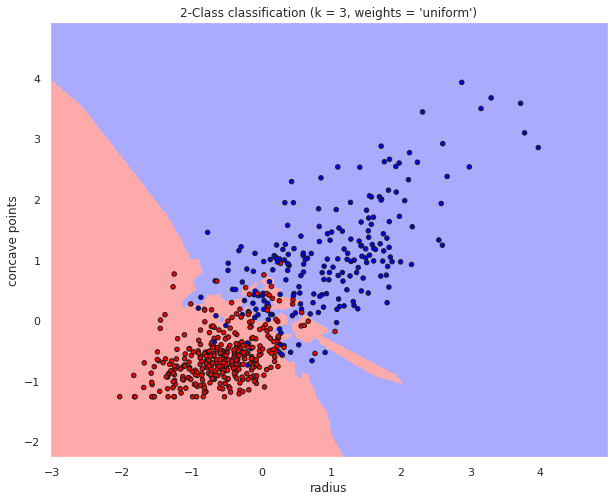

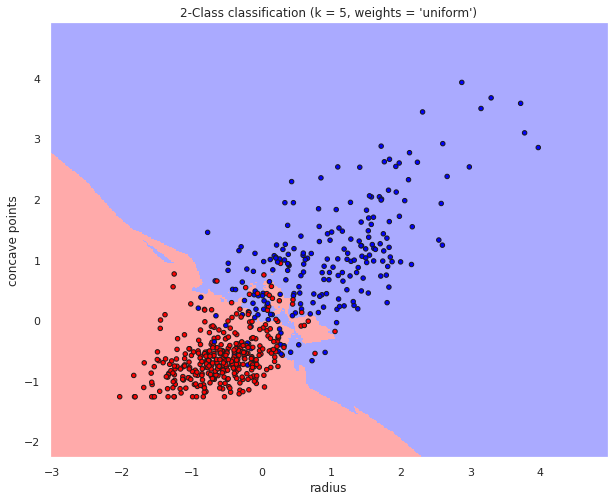

In [82]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
weights ='uniform'
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we only take the first two features: radius_mean and concave points_mean. We could avoid this ugly
# slicing by using a two-dim dataset

for n_neighbors in [3,5]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_scaled[:,[0,5]], y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
    y_min, y_max = X_scaled[:,5].min() - 1, X_scaled[:,5].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_scaled[:, 0], X_scaled[:, 5], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel("radius")
    plt.ylabel("concave points")

plt.show()

Recall score could be also compared between train and test sets plotting for each number of nearest neighbors. As can be observed, the best number of neighbours for the training data is 5 where recall score is above 0.93:

/home/sopha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sopha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Recall')

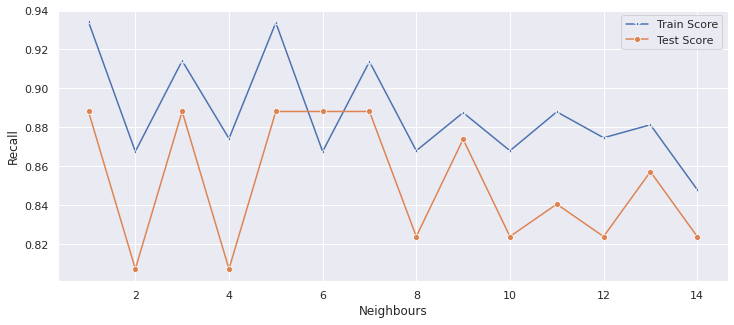

In [83]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    train_scores.append(cross_val_score(knn, X_scaled_train,y_train,cv=10, scoring='recall').mean())
    test_scores.append(cross_val_score(knn, X_scaled_holdout,y_holdout,cv=10, scoring='recall').mean())
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.xlabel("Neighbours")
plt.ylabel("Recall")

There are a number of model evaluation techniques for the classification problem, I decided to choose three performance metrics: accuracy, recall and precision scores. The most important is recall score, as we are interested in how many of malignant tumours were predicted correctly. Scores are computed for the holdout part, which takes 30% of data, using 10-fold cross validation, and compared with actual values.

Decision tree: Accuracy Score: 0.9181286549707602 Recall Score (how much of malignant tumours were predicted correctly): 0.9672131147540983 Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): 0.8309859154929577

Random Forest:

CV accuracy score: 94.89%
CV recall score: 92.74%
CV precision score: 93.05%
Logistic regression:

Accuracy Score: 0.3567251461988304
Recall Score (how much of malignant tumours were predicted correctly): 1.0
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): 0.3567251461988304
kNN:

Accuracy Score : 0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) : 0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): 0.8615384615384616
Random forest is considered as an advanced machine learning technique, especially if the dataset is imbalanced or has categorical features. But in this case, all independent variables are numerical and target class has ratio approximately 0.6:0.4. An interesting observation I found when increasing the variance in the explanatory and noise variables, logistic regression consistently performed with higher overall accuracy as compared to random forest. Kaitlin Kirasich and Trace Smith described in their review [9] the main differences between Random Forest and Logistic Regression in Binary Classification for Heterogeneous Datasets.

Logistic regression deals well with scaled numerical features and when the data is linearly separable. However, if variables are not normalized, the accuracy score drops sharply from 95% to 35%.

The difficulty of model selection by evaluating the overall classification performance between random forest and logistic regression for datasets comprised of various underlying structures: increasing the variance in the explanatory and noise variables, increasing the number of noise variables, increasing the number of explanatory variables, increasing the number of observations.

# Conclusion
Random forest shows better performance based on recall scores, which means more malignant tumours were predicted correctly, although logistic regression has a higher precision score. One of the greatest advantages of using Random forest in a classification problem is that it is robust to outliers because of the random sampling method and it handles both continuous and discrete variables equally well. Moreover, random forest is insensitive to the scaling of features as well as any other monotonic transformations due to the random subspace selection. However, the trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). Another great drawback of using decision trees is that we need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree.

Other researchers have applied computer-based image analysis to various aspects of breast cytology interpretation. Wittekind and Schulte found that mean nuclear area, mean maximum nuclear diameter and mean nuclear perimeter differed significantly between benign and malignant breast cell obtained by FNA. Other studies either have used direct scanning of Feulgen stained material or have analyzed digitized images.

Most of the issues involved in the preparation of the sample lie in the medical realm. Certain selection bias is introduced in the process when the physician decides what part of the sample should be extracted. While the bias is very difficult to quantify, it is possible that if the physician suspects the sample to be malignant, then the selected cells will reflect that suspicion. The bias could be reduced by selecting a number of different areas for digitization, or possibly eliminated altogether by automating the selection process.